In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('..\sensex_data_2000_to_2025.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03 00:00:00+05:30,5209.540039,5384.660156,5209.540039,5375.109863,0,0.0,0.0
1,2000-01-04 00:00:00+05:30,5533.979980,5533.979980,5376.430176,5491.009766,0,0.0,0.0
2,2000-01-05 00:00:00+05:30,5265.089844,5464.350098,5184.479980,5357.000000,0,0.0,0.0
3,2000-01-06 00:00:00+05:30,5424.209961,5489.859863,5391.330078,5421.529785,0,0.0,0.0
4,2000-01-07 00:00:00+05:30,5358.279785,5463.250000,5330.580078,5414.479980,0,0.0,0.0
...,...,...,...,...,...,...,...,...
6356,2025-10-21 00:00:00+05:30,84484.671875,84665.437500,84286.398438,84426.343750,3400,0.0,0.0
6357,2025-10-23 00:00:00+05:30,85154.148438,85290.062500,84445.250000,84556.398438,25700,0.0,0.0
6358,2025-10-24 00:00:00+05:30,84667.226562,84707.437500,83957.148438,84211.882812,13600,0.0,0.0
6359,2025-10-27 00:00:00+05:30,84297.390625,84932.078125,84294.203125,84778.843750,12000,0.0,0.0


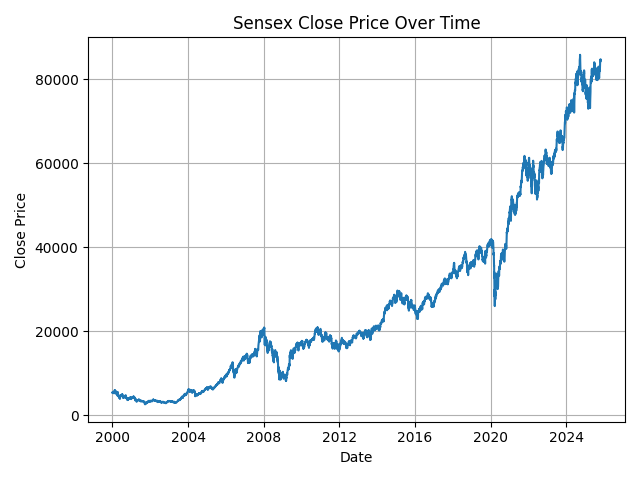

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Sensex Close Price Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
df_custom = df[['Volume','Close']]
df_custom

,Volume,Close
0,0,5375.109863
1,0,5491.009766
2,0,5357.000000
3,0,5421.529785
4,0,5414.479980
...,...,...
6356,3400,84426.343750
6357,25700,84556.398438
6358,13600,84211.882812
6359,12000,84778.843750


In [5]:
df_custom_nonzero = df_custom[df_custom['Volume'] >0].reset_index(drop=True)
df_custom_nonzero

,Volume,Close
0,21200,3720.750000
1,22800,3686.340088
2,18400,3721.649902
3,22000,3668.909912
4,22000,3647.580078
...,...,...
5470,3400,84426.343750
5471,25700,84556.398438
5472,13600,84211.882812
5473,12000,84778.843750


In [6]:
close_prices = df_custom_nonzero['Close']
print(close_prices)

0        3720.750000
1        3686.340088
2        3721.649902
3        3668.909912
4        3647.580078
            ...     
5470    84426.343750
5471    84556.398438
5472    84211.882812
5473    84778.843750
5474    84628.156250
Name: Close, Length: 5475, dtype: float64


In [7]:
import numpy as np
close_prices_array = close_prices.to_numpy()
close_prices_array.shape

(5475,)

In [8]:
close_prices_array

array([ 3720.75      ,  3686.34008789,  3721.64990234, ...,
       84211.8828125 , 84778.84375   , 84628.15625   ], shape=(5475,))

In [9]:
#Find ema9, ema20, ema50, ema100, ema200 and ema500 of close prices
ema9 = close_prices.ewm(span=9, adjust=False).mean()
ema20 = close_prices.ewm(span=20, adjust=False).mean()
ema50 = close_prices.ewm(span=50, adjust=False).mean()
ema100 = close_prices.ewm(span=100, adjust=False).mean()
ema200 = close_prices.ewm(span=200, adjust=False).mean()
ema500 = close_prices.ewm(span=500, adjust=False).mean()

In [10]:
df_custom_nonzero['EMA9'] = ema9
df_custom_nonzero['EMA20'] = ema20
df_custom_nonzero['EMA50'] = ema50
df_custom_nonzero['EMA100'] = ema100
df_custom_nonzero['EMA200'] = ema200
df_custom_nonzero['EMA500'] = ema500
df_custom_nonzero

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500
0,21200,3720.750000,3720.750000,3720.750000,3720.750000,3720.750000,3720.750000,3720.750000
1,22800,3686.340088,3713.868018,3717.472866,3719.400592,3720.068616,3720.407613,3720.612635
2,18400,3721.649902,3715.424395,3717.870679,3719.488800,3720.099928,3720.419974,3720.616776
3,22000,3668.909912,3706.121498,3713.207748,3717.505314,3719.086265,3719.907436,3720.410361
4,22000,3647.580078,3694.413214,3706.957494,3714.763148,3717.670300,3719.187761,3720.119622
...,...,...,...,...,...,...,...,...
5470,3400,84426.343750,83287.220079,82547.161419,81932.324130,81412.917556,80392.752287,76262.849154
5471,25700,84556.398438,83541.055751,82738.517325,82035.229005,81475.164703,80434.181602,76295.957135
5472,13600,84211.882812,83675.221163,82878.837848,82120.587978,81529.357140,80471.770669,76327.557637
5473,12000,84778.843750,83895.945681,83059.790791,82224.833302,81593.703410,80514.627117,76361.295306


Now calculate MACD (Mean Average Convergence Divergence)

In [11]:
ema12 = close_prices.ewm(span=12, adjust=False).mean()
ema26 = close_prices.ewm(span=26, adjust=False).mean()
macd = ema12 - ema26
signal = macd.ewm(span=9, adjust=False).mean()
macd_sig_dif = macd - signal
macd_sig_dif.tail(20)

5455   -175.145035
5456   -213.059348
5457   -180.994622
5458   -137.724574
5459    -66.469606
5460     -9.740660
5461     16.442362
5462     57.267691
5463    100.550092
5464    110.806552
5465     91.704263
5466    110.675247
5467    170.564290
5468    228.468113
5469    276.890376
5470    293.978806
5471    294.142724
5472    252.733714
5473    245.030601
5474    212.500380
Name: Close, dtype: float64

In [12]:
#Add macd_sig_dif to dataframe
df_custom_nonzero['MACD'] = macd_sig_dif
df_custom_nonzero

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD
0,21200,3720.750000,3720.750000,3720.750000,3720.750000,3720.750000,3720.750000,3720.750000,0.000000
1,22800,3686.340088,3713.868018,3717.472866,3719.400592,3720.068616,3720.407613,3720.612635,-2.195960
2,18400,3721.649902,3715.424395,3717.870679,3719.488800,3720.099928,3720.419974,3720.616776,-1.198835
3,22000,3668.909912,3706.121498,3713.207748,3717.505314,3719.086265,3719.907436,3720.410361,-3.869016
4,22000,3647.580078,3694.413214,3706.957494,3714.763148,3717.670300,3719.187761,3720.119622,-6.684479
...,...,...,...,...,...,...,...,...,...
5470,3400,84426.343750,83287.220079,82547.161419,81932.324130,81412.917556,80392.752287,76262.849154,293.978806
5471,25700,84556.398438,83541.055751,82738.517325,82035.229005,81475.164703,80434.181602,76295.957135,294.142724
5472,13600,84211.882812,83675.221163,82878.837848,82120.587978,81529.357140,80471.770669,76327.557637,252.733714
5473,12000,84778.843750,83895.945681,83059.790791,82224.833302,81593.703410,80514.627117,76361.295306,245.030601


Now calculate the RSI (Relative Strength Index) and add column RSI to the dataframe

In [13]:
n=14
difference = df_custom_nonzero['Close'].diff()
gain = difference.where(difference > 0, 0)
loss = -difference.where(difference < 0, 0)
avg_gain = gain.ewm(alpha=1/n, min_periods=n).mean()
avg_loss = loss.ewm(alpha=1/n, min_periods=n).mean()
RS = avg_gain / avg_loss
RSI = 100 - (100 / (1 + RS))
df_custom_nonzero['RSI'] = RSI
df_custom_nonzero_nonnan = df_custom_nonzero.dropna().reset_index(drop=True)
df_custom_nonzero_nonnan

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,37000,3792.610107,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419
1,26000,3815.310059,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714
2,19800,3832.500000,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109
3,26000,3765.820068,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537
4,29000,3741.659912,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981
...,...,...,...,...,...,...,...,...,...,...
5457,3400,84426.343750,83287.220079,82547.161419,81932.324130,81412.917556,80392.752287,76262.849154,293.978806,72.178588
5458,25700,84556.398438,83541.055751,82738.517325,82035.229005,81475.164703,80434.181602,76295.957135,294.142724,72.917185
5459,13600,84211.882812,83675.221163,82878.837848,82120.587978,81529.357140,80471.770669,76327.557637,252.733714,67.783603
5460,12000,84778.843750,83895.945681,83059.790791,82224.833302,81593.703410,80514.627117,76361.295306,245.030601,71.357415


Now we create a target column. We will first try to make it a classification problem. The possible outputs will be: 1, 0, -1.
The target will be 1 if the close price increases by 0.25% or more in the next day. It will be -1 if the close price decreases
by 0.25% or more in the next day. Otherwise, it will be 0.

In [14]:
current_price = df_custom_nonzero_nonnan['Close']
next_day_price = df_custom_nonzero_nonnan['Close'].shift(periods=-1)
percent_change = ((next_day_price - current_price)/current_price) * 100 if next_day_price is not None else None
conditions =[percent_change >= 0.25, (percent_change < 0.25) & (percent_change > -0.25), percent_change <= -0.25]
corresponding_values = [1, 0, -1]
test_df = pd.DataFrame(df_custom_nonzero_nonnan['Close'])
test_df['Target'] = np.select(conditions, corresponding_values, default=None)
test_df
# df_custom_nonzero_nonnan['Target'] = np.select(conditions, corresponding_values)
# df_custom_nonzero_nonnan

,Close,Target
0,3792.610107,1
1,3815.310059,1
2,3832.500000,-1
3,3765.820068,-1
4,3741.659912,1
...,...,...
5457,84426.343750,0
5458,84556.398438,-1
5459,84211.882812,1
5460,84778.843750,0
